# Web Scraping with Pandas

Based on the Data Professor youtube video:
https://youtu.be/JUSFaWkAASI

### Load Dependencies

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import yfinance as yf

### Create Web Scraping

In [14]:
# Wikipedia List of List of S&P 500 companies
url_wikipedia = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Output csv data file name
file_out = os.path.join('List_of_S6P_500_companies.csv')

In [4]:
def load_data(url, table_no):
    html = pd.read_html(url_wikipedia, header=0)
    df = html[table_no]
    return df

In [5]:
companies_list_df = load_data(url_wikipedia, table_no=0)
companies_list_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740.0,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800.0,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152.0,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094.0,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373.0,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061.0,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212.0,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869.0,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380.0,1873


In [15]:
# Save data as csv
companies_list_df.to_csv(file_out, index=False)

### Data Analysis

In [7]:
companies_list_df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [8]:
# Group Companies by Sector
companies_list_df.groupby('GICS Sector').count()

,Symbol,Security,SEC filings,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,26,26,26,26,26,24,26,24
Consumer Discretionary,61,61,61,60,60,53,60,60
Consumer Staples,32,32,32,32,32,29,32,32
Energy,25,25,25,25,25,24,25,25
Financials,65,65,65,65,65,53,65,63
Health Care,63,63,63,63,63,58,63,62
Industrials,73,73,73,73,73,67,73,72
Information Technology,73,73,73,72,72,66,72,72
Materials,28,28,28,28,28,26,28,28


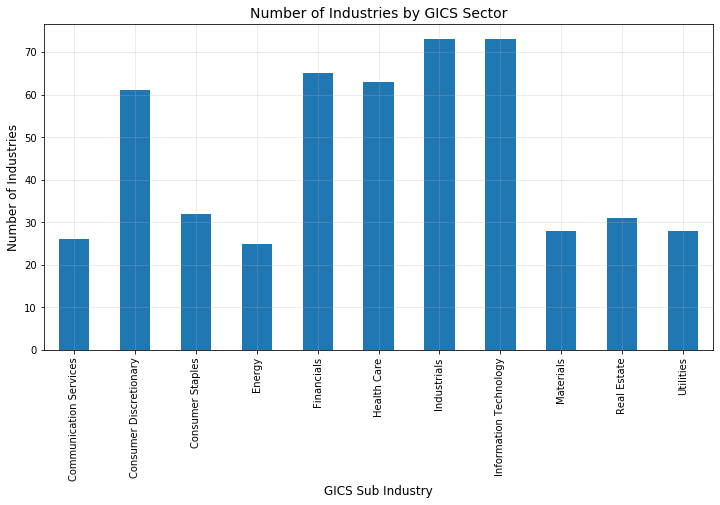

In [56]:
# Plot Companies by Sector
ax = companies_list_df.groupby('GICS Sector')['Symbol'].count().plot.bar(figsize=(12,6))
ax.set_xlabel('GICS Sub Industry',size=12)
ax.set_ylabel('Number of Industries',size=12)
ax.set_title(f"Number of Industries by GICS Sector", size=14)
# ax.set_yticks([0, 5, 10, 15, 20])
ax.grid(alpha=.3)
plt.savefig('GICS_Sector.png')

In [31]:
GICS_Sub_Industry = companies_list_df.groupby('GICS Sub Industry').count().sort_values('Symbol',ascending=False)
GICS_Sub_Industry

,Symbol,Security,SEC filings,GICS Sector,Headquarters Location,Date first added,CIK,Founded
GICS Sub Industry,,,,,,,,
Health Care Equipment,20,20,20,20,20,19,20,20
Industrial Machinery,14,14,14,14,14,14,14,14
Electric Utilities,13,13,13,13,13,9,13,13
Semiconductors,13,13,13,13,13,11,13,13
Packaged Foods & Meats,12,12,12,12,12,9,12,12
...,...,...,...,...,...,...,...,...
Food Distributors,1,1,1,1,1,1,1,1
Drug Retail,1,1,1,1,1,1,1,1
Diversified Chemicals,1,1,1,1,1,1,1,1


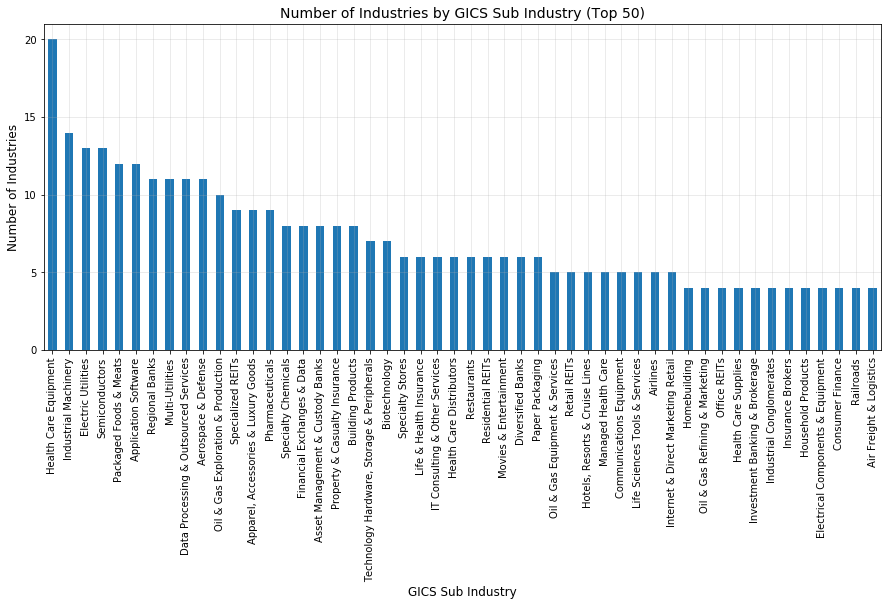

In [55]:
# Plot Companies by Sector
num_industries = 50
ax = GICS_Sub_Industry['Symbol'].head(num_industries).plot.bar(figsize=(15,6))
ax.set_xlabel('GICS Sub Industry',size=12)
ax.set_ylabel('Number of Industries',size=12)
ax.set_title(f"Number of Industries by GICS Sub Industry (Top {num_industries})", size=14)
ax.set_yticks([0, 5, 10, 15, 20])
ax.grid(alpha=.3)
plt.savefig('GICS_Sub_Industry.png')

### Using Yfinance for retrieve stock prices

In [61]:
# List of Stock Symbols
list_symbol_companies = list(companies_list_df['Symbol'])

In [63]:
# Retrieve the stock prices
stock_price = yf.download(list_symbol_companies)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: 1d data not available for startTime=-2208988800 and endTime=1602425966. Only 100 years worth of day granularity data are allowed to be fetched per request.


In [64]:
# Save data as csv
companies_list_df.to_csv('stock_price.csv', index=False)

In [65]:
stock_price

Adj Close                                                       \
                     A    AAL         AAP        AAPL       ABBV        ABC   
Date                                                                          
1962-01-02         NaN    NaN         NaN         NaN        NaN        NaN   
1962-01-03         NaN    NaN         NaN         NaN        NaN        NaN   
1962-01-04         NaN    NaN         NaN         NaN        NaN        NaN   
1962-01-05         NaN    NaN         NaN         NaN        NaN        NaN   
1962-01-08         NaN    NaN         NaN         NaN        NaN        NaN   
...                ...    ...         ...         ...        ...        ...   
2020-10-05  103.120003  13.12  155.860001  116.500000  87.930000  96.389999   
2020-10-06  101.629997  12.53  155.160004  113.160004  85.889999  95.629997   
2020-10-07  103.879997  13.07  156.809998  115.080002  87.070000  95.589996   
2020-10-08  104.160004  13.16  157.660004  114.970001  87.339996  98.489998   
2020-10-09  105.760002  13.20  155.320007  116.970001  87.699997  96.860001   

                                                            ...      Volume  \
                  ABMD         ABT         ACN        ADBE  ...        XLNX   
Date                                                        ...               
1962-01-02         NaN         NaN         NaN         NaN  ...         NaN   
1962-01-03         NaN         NaN         NaN         NaN  ...         NaN   
1962-01-04         NaN         NaN         NaN         NaN  ...         NaN   
1962-01-05         NaN         NaN         NaN         NaN  ...         NaN   
1962-01-08         NaN         NaN         NaN         NaN  ...         NaN   
...                ...         ...         ...         ...  ...         ...   
2020-10-05  270.690002  108.559998  222.618271  486.470001  ...    989700.0   
2020-10-06  264.820007  106.250000  219.490524  478.980011  ...   1386100.0   
2020-10-07  268.540009  107.739998  222.578430  493.149994  ...   1385100.0   
2020-10-08  271.200012  108.540001  224.729996  490.839996  ...   1082300.0   
2020-10-09  273.559998  109.650002  228.690002  502.160004  ...  24050700.0   

                                                                             \
                   XOM      XRAY        XRX       XYL        YUM        ZBH   
Date                                                                          
1962-01-02    902400.0       NaN        NaN       NaN        NaN        NaN   
1962-01-03   1200000.0       NaN        NaN       NaN        NaN        NaN   
1962-01-04   1088000.0       NaN        NaN       NaN        NaN        NaN   
1962-01-05   1222400.0       NaN        NaN       NaN        NaN        NaN   
1962-01-08   1388800.0       NaN        NaN       NaN        NaN        NaN   
...                ...       ...        ...       ...        ...        ...   
2020-10-05  22965200.0  507000.0  4242200.0  424700.0  1415100.0   607200.0   
2020-10-06  26731800.0  590100.0  3224900.0  598900.0  1282300.0   752500.0   
2020-10-07  23779300.0  557800.0  2388500.0  600500.0  1523400.0   717900.0   
2020-10-08  34413700.0  616400.0  2395700.0  560700.0  1239100.0   793100.0   
2020-10-09  29196100.0  925800.0  2264300.0  722100.0  1169700.0  1032300.0   

                                            
                ZBRA       ZION        ZTS  
Date                                        
1962-01-02       NaN        NaN        NaN  
1962-01-03       NaN        NaN        NaN  
1962-01-04       NaN        NaN        NaN  
1962-01-05       NaN        NaN        NaN  
1962-01-08       NaN        NaN        NaN  
...              ...        ...        ...  
2020-10-05  375200.0  1567900.0  1274600.0  
2020-10-06  378300.0  1621700.0  1194900.0  
2020-10-07  279100.0  1319000.0  3591700.0  
2020-10-08  221300.0   992400.0  3642400.0  
2020-10-09  216200.0   910200.0  1620900.0  

[14816 rows x 3030 columns]